In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Загрузка датафрейма

In [2]:
mut_df = pd.read_excel('Mutations.xlsx', usecols=['Hugo_Symbol', 'Chromosome', 'Start_Position', 'End_Position', 'Variant_Classification', 'Tumor_Sample_Barcode','t_ref_count','t_alt_count'])

In [3]:
mut_df['tmp'] = 1
mut_df

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Tumor_Sample_Barcode,t_ref_count,t_alt_count,tmp
0,CCDC181,1,169390813,169390813,Missense_Mutation,TCGA-CV-6935-01,142,53,1
1,NBPF10,1,145302714,145302714,Silent,TCGA-CV-6935-01,144,5,1
2,ZIM3,19,57646307,57646307,Silent,TCGA-CV-6935-01,70,49,1
3,FREM2,13,39446956,39446956,Silent,TCGA-CV-6935-01,64,40,1
4,PCLO,7,82582174,82582174,Missense_Mutation,TCGA-CV-6935-01,47,18,1
...,...,...,...,...,...,...,...,...,...
120397,MFRP,11,119214569,119214569,Missense_Mutation,TCGA-CR-7365-01,83,38,1
120398,LDLR,19,11242105,11242105,3'UTR,TCGA-CR-7365-01,15,11,1
120399,ACTN3,11,66321927,66321928,Intron,TCGA-CN-A49C-01,4,2,1
120400,ANKRD36C,2,96652499,96652499,Missense_Mutation,TCGA-F7-A61S-01,16,6,1


# Фильтрация датафрейма

In [4]:
# Удаляются все мутации, не влияющие на структуру белка (все, кроме миссенс и нонсенс мутаций)
# А также, удаляются мутации, у которых покрытие альтернативного аллеля меньше 11

In [5]:
mut_df_f = mut_df[(mut_df.Variant_Classification.isin(['Missense_Mutation', 'Nonsense_mutation']))&(mut_df.t_alt_count > 10)]

In [10]:
mut_df_f

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Tumor_Sample_Barcode,t_ref_count,t_alt_count,tmp
0,CCDC181,1,169390813,169390813,Missense_Mutation,TCGA-CV-6935-01,142,53,1
4,PCLO,7,82582174,82582174,Missense_Mutation,TCGA-CV-6935-01,47,18,1
8,PCDH15,10,56106133,56106133,Missense_Mutation,TCGA-CV-6935-01,59,26,1
9,ZNF521,18,22804737,22804737,Missense_Mutation,TCGA-CV-6935-01,20,19,1
15,METTL3,14,21969087,21969087,Missense_Mutation,TCGA-CV-6935-01,8,12,1
...,...,...,...,...,...,...,...,...,...
120334,SOGA3,6,127796905,127796905,Missense_Mutation,TCGA-CN-6024-01,53,24,1
120365,CSMD2,1,34082539,34082539,Missense_Mutation,TCGA-CV-7255-01,88,17,1
120366,CSMD2,1,34082539,34082539,Missense_Mutation,TCGA-CV-7255-01,88,17,1
120382,AMACR,5,34005991,34005991,Missense_Mutation,TCGA-CX-A4AQ-01,36,17,1


# Преобразование датафрейма

In [12]:
mut_df_f_mod = pd.pivot(mut_df_f[['Tumor_Sample_Barcode','Hugo_Symbol', 'tmp']].drop_duplicates(),
                                                                    index='Tumor_Sample_Barcode', columns = 'Hugo_Symbol', 
                                                                    values = 'tmp')

In [13]:
mut_df_f_mod

Hugo_Symbol,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL3,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-4074-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-4075-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-4076-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-4077-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-UF-A7JV-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-UP-A6WW-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
mut_df_f_mod = mut_df_f_mod.fillna(0)
mut_df_f_mod

Hugo_Symbol,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL3,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4074-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4075-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4076-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4077-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-UF-A7JV-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-UP-A6WW-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Дополнительная фильтрация датафрейма

In [15]:
print('Не все гены вносят одинаковый вклад в формирование опухоли')
print(f'Мутация в гене TP53 случилась у {int(mut_df_f_mod.TP53.sum())} ({int(mut_df_f_mod.TP53.sum())/mut_df_f_mod.shape[0]*100:.2f}%) пациентов')
print(f'Мутация в гене A1BG случилась у {int(mut_df_f_mod.A1BG.sum())} ({int(mut_df_f_mod.A1BG.sum())/mut_df_f_mod.shape[0]*100:.2f}%) пациентов')
print('Можно удалить те гены, которые слишком редко мутируют. Потому что они вносят шум в данные и в них мало полезного сигнала')

Не все гены вносят одинаковый вклад в формирование опухоли
Мутация в гене TP53 случилась у 186 (36.69%) пациентов
Мутация в гене A1BG случилась у 3 (0.59%) пациентов
Можно удалить те гены, которые слишком редко мутируют. Потому что они вносят шум в данные и в них мало полезного сигнала


In [16]:
mut_df_f_mod

Hugo_Symbol,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL3,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4074-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4075-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4076-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4077-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-UF-A7JV-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-UP-A6WW-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
mut_df_f_mod.sum().value_counts()

1.0      4655
2.0      3028
3.0      1936
4.0      1208
5.0       685
6.0       520
7.0       264
8.0       225
9.0       139
10.0      107
11.0       77
12.0       64
13.0       45
14.0       42
16.0       26
17.0       20
15.0       18
19.0       18
18.0       14
21.0       11
20.0       10
22.0        9
23.0        5
24.0        4
25.0        4
28.0        3
29.0        3
32.0        2
30.0        2
31.0        2
37.0        2
44.0        2
41.0        1
34.0        1
35.0        1
162.0       1
52.0        1
72.0        1
67.0        1
56.0        1
33.0        1
59.0        1
186.0       1
27.0        1
62.0        1
66.0        1
39.0        1
dtype: int64

In [28]:
filt_threshold = 0.05
# Будут отфильтрованы те гены, которые мутировали меньше чем у 5% пациенов

In [29]:
mut_df_f_mod_f = mut_df_f_mod.loc[:, (mut_df_f_mod.mean(numeric_only=True) >= filt_threshold)]

In [30]:
mut_df_f_mod_f

Hugo_Symbol,AHNAK,AHNAK2,APOB,COL11A1,CSMD3,DMD,DNAH5,FAM135B,FAT4,FLG,...,PCLO,PIK3CA,PKHD1L1,RP1,RYR2,SYNE1,TP53,TTN,USH2A,XIRP2
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BA-4074-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TCGA-BA-4075-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
TCGA-BA-4076-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
TCGA-BA-4077-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TCGA-UF-A7JV-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
TCGA-UP-A6WW-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Снижение размеронсти и визуализация

In [44]:
pca = PCA(n_components=2)
pca.fit(mut_df_f_mod_f)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
print(pca.explained_variance_)

[0.35764397 0.23339652]


In [46]:
scores_pca = pca.transform(mut_df_f_mod_f)

In [47]:
scores_pca

array([[-0.59908703,  0.2080051 ],
       [ 0.10927271, -0.7271433 ],
       [-0.12571985,  0.2146638 ],
       ...,
       [-0.59908703,  0.2080051 ],
       [-0.1926127 , -0.68908339],
       [-0.59908703,  0.2080051 ]])

In [48]:
pca_df = pd.DataFrame(data=scores_pca, columns = ['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-0.599087,0.208005
1,0.109273,-0.727143
2,-0.125720,0.214664
3,1.792787,-0.258379
4,0.205527,0.651916
...,...,...
502,-0.109597,0.195997
503,-0.068143,0.543034
504,-0.599087,0.208005
505,-0.192613,-0.689083


In [49]:
pca_df.index = mut_df_f_mod_f.index
pca_df

,PC1,PC2
Tumor_Sample_Barcode,,
TCGA-4P-AA8J-01,-0.599087,0.208005
TCGA-BA-4074-01,0.109273,-0.727143
TCGA-BA-4075-01,-0.125720,0.214664
TCGA-BA-4076-01,1.792787,-0.258379
TCGA-BA-4077-01,0.205527,0.651916
...,...,...
TCGA-UF-A7JT-01,-0.109597,0.195997
TCGA-UF-A7JV-01,-0.068143,0.543034
TCGA-UP-A6WW-01,-0.599087,0.208005


Text(0.5, 1.0, 'PCA plot')

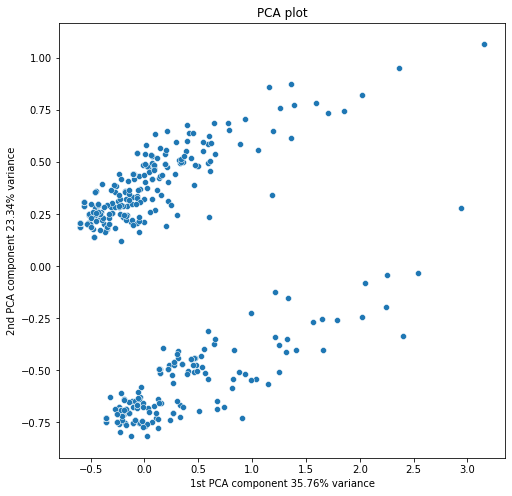

In [50]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2")
plt.xlabel(f"1st PCA component {pca.explained_variance_[0]*100:.2f}% variance")
plt.ylabel(f"2nd PCA component {pca.explained_variance_[1]*100:.2f}% variance")
plt.title("PCA plot")

# Кластеризация

## Сколько кластеров выбрать?

In [38]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(mut_df_f_mod_f)
    wcss.append(kmeans.inertia_)

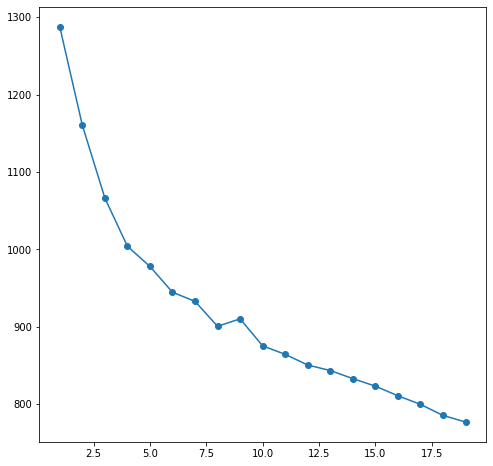

In [39]:
plt.figure(figsize = (8,8))
plt.plot(range(1,20), wcss, marker = 'o')

## Кластеризация алгоритмом k-means

In [51]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [52]:
kmeans.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [53]:
pca_df['Cluster'] = kmeans.labels_

## Визуализация кластеров

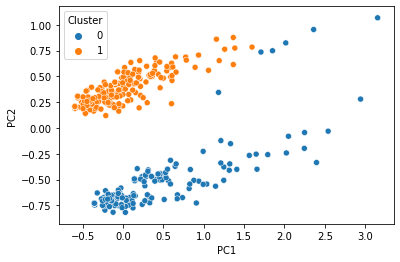

In [54]:
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster")